# Setting up the Google Colab Notebook

## 1 Start a new Google Colab Notebook and validate the libraries

### Check the version of Python (3.6+)

In [0]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


### Check the version of Numpy (1.18+)

In [0]:
import numpy as np
print(np.__version__)

1.18.4


### Check the version of Pandas (1.0+)

In [0]:
import pandas as pd
print(pd.__version__)

1.0.3


### Check the version of TensorFlow (2.2+)

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


## 2 Manipulating data with Pandas

### Create a 4 column DataFrame, fill the first column with dates, fill the second and third column with random numbers.  

In [0]:
import pandas as pd
import random

df = pd.DataFrame(
    {'Date': pd.period_range('1/1/2018', freq='M', periods=36),
     'Home': [random.randint(1,100) for x in range(36) ],
     'Away': [random.randint(1,100) for x in range(36) ],
     'Result': [-1 for x in range(36)]
     })


### Fill the fourth column with the difference between columns 2 and 3  

This step will be useful later in the project. I want to show how easy it is to do a function on an entire DataFrame at one time. If you are looping you need to look through some Pandas tutorials.

In [0]:
df['Result'] = df['Home'] - df['Away']
df.head()

,Date,Home,Away,Result
0,2018-01,29,22,7
1,2018-02,68,22,46
2,2018-03,47,62,-15
3,2018-04,71,86,-15
4,2018-05,19,23,-4


### Break apart based on year  

This section shows how you can filter based on a column value. We will do this later in the project to break apart different basketball seasons. Be away of the `.copy()` at the end of the calls. We want to make sure we are getting a copy of the data in case we change the values later in the notebook.

In [0]:
df2018 = df[ df['Date'] < '2109-1-1' ].copy()
df2019 = df[ (df['Date'] > '2018-12-31') & (df['Date'] < '2020-1-1')].copy()
df2020 = df[ (df['Date'] > '2019-12-31') & (df['Date'] < '2021-1-1')].copy()


## 3 Create a neural network that can convert Celcius to Fahrenheit

### Create the simple neural network

**Below are the key parts to the network**  
`Sequential`: We will want this to be a sequential network. For the most part, this is the default type. It just means that the data flows sequentially through all of the layers.  
`Dense`: This is the simplest layer available. For a deeper understanding you can check out the official documentation [here](https://keras.io/api/layers/core_layers/dense/)  
`units`: This specifies the number of neurons in the layer. In other words, this is the number of variables the layer has to learn.  
`input_shape`: This specifies how many parameters that we will pass to our network. Since we are just going to send in the temperate in Celcius we only need 1.  
`compile`: We need to compile the network to be able to start using it.  
`loss`: This is the loss function. It is how the network is able to determin how far off the prediction is from the desired outcome.  
`optimizer`: This determines the way the internal values are adjusted to reduce the loss. For more information on the Adam optimizer go to the documentation [here](https://keras.io/api/optimizers/adam/). 


In [0]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[1])
)
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))

### Use Numpy to generate ~20 input/output values to test

These values don't matter too much. We just need some data.

In [0]:
celsius = np.array([], float)
fahrenheit = np.array([], float)
for i in range(0, 100, 5):
    celsius = np.append(celsius, i)
    fahrenheit = np.append(fahrenheit, i * 1.8 + 32 )

print(celsius)
print(fahrenheit)


[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]
[ 32.  41.  50.  59.  68.  77.  86.  95. 104. 113. 122. 131. 140. 149.
 158. 167. 176. 185. 194. 203.]


### Train the neural network

**Below are the key parts of the training code**  
`history`: These values are the results of the training. We will use these after to graph what we have done.  
`fit`: This is the method that does the training of the model. We are passing in our celsius data and also passing in our expected output (fahrenheit) data.  
`epochs`: This parameter specifies how many times this cycle should be run.  

In [0]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)


To validate that you are getting closer to your desired results we can graph the values that came back from the training. A common way to do this is by graphing your loss value versus your training epochs.  

Ideally, when you are training you should see the loss value drop and eventually level out. At this point, you know that you have trained your model. Now, this does NOT ensure that it will pass your tests but they should be pretty close if your data is a good representation of your full data set.

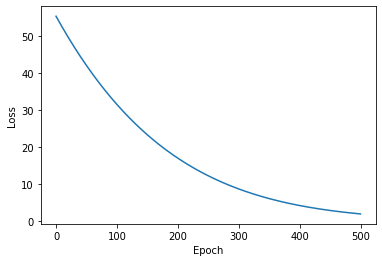

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

## Testing the network

Here we will pass in some values to see if we get back what we expect. These should be pretty close but not exact.

In [0]:
print('5 * 1.8 + 32 = 41')
print(model.predict([5]))
print('99 * 1.8 + 32 = 210.2')
print(model.predict([99]))

5 * 1.8 + 32 = 41
[[38.58188]]
99 * 1.8 + 32 = 210.2
[[211.58064]]


### Examine the weights

Here is the part that I wanted to show that will explain the inner workings of a neural network. I hope that seeing how the weights and biases are set through training it will make neural networks something that you can manage and not a scary buzzword.

In [0]:
print("This is the weight that should be pretty close to the *1.8 in the formula: {}".format( model.layers[0].get_weights()[0][0] ))
print("This is the bias that should be pretty close to the +32 in the formula: {}".format( model.layers[0].get_weights()[1] ))


This is the first weight that should be pretty close to the *1.8 in the formula: [1.8404124]
This is the second weight that should be pretty close to the +32 in the formula: [29.379818]


So, how did you do? Did your weights come pretty close to matching $F = C*1.8 + 32$??